# Project: HMO - Predictng and Preventing cost on Health.

## 1. Data Loading and Importing all the required libraries.



In [3]:
install.packages("tidyverse")
install.packages("imputeTS")
install.packages("caret")
install.packages("kernlab")
install.packages("ggplot2")
install.packages("maps")
install.packages("ggmap")
install.packages("mapproj")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘markdown’, ‘png’, ‘jpeg’, ‘quadprog’, ‘quantmod’, ‘gridtext’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘ggtext’, ‘stinepack’, ‘forecast’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-l

In [4]:
library(tidyverse)   # For data manipulation and visualization
#library(arules)      # For association rule mining
#library(arulesViz)   # For visualizing association rules
library(imputeTS)    # For time series imputation
library(caret)       # For machine learning model training
library(kernlab)     # For kernel-based machine learning methods
library(ggplot2)
library(maps)
library(ggmap)
library(mapproj)
library(e1071)
library(rpart)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘kernlab’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map


ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service/>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles/>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.


## 2. Importing the dataset

In [115]:
#Storing the data URL in a variable.
URL = "https://intro-datascience.s3.us-east-2.amazonaws.com/HMO_data.csv"
#datafile1 <- "F:\\MastersADS\\Sem1\\IST687-IntroToDS\\Project\\ShinyApp\\TEST7DEC\\treeModel.csv"
#datafile2 <- "F:\\MastersADS\\Sem1\\IST687-IntroToDS\\Project\\ShinyApp\\TEST7DEC\\HMO_TEST_data_sample_solution.csv"

#reading csv file and storing data into a dataframe.
df <- read_csv(URL)
#dfsample <- read_csv(datafile1)
#dfsolution <- read_csv(datafile2)
#dfsolution$expensive <- as.factor(dfsolution$expensive)

Rows: 7582 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): smoker, location, location_type, education_level, yearly_physical, ...
dbl (6): X, age, bmi, children, hypertension, cost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 3. Structure of the dataset

In [116]:
# Displaying structure information of the dataframe
print(str(df))

# Separating output for clarity
print("--------------------------------------------")

# Printing summary statistics of the dataframe
print(summary(df))

spc_tbl_ [7,582 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X              : num [1:7582] 1 2 3 4 5 7 9 10 11 12 ...
 $ age            : num [1:7582] 18 19 27 34 32 47 36 59 24 61 ...
 $ bmi            : num [1:7582] 27.9 33.8 33 22.7 28.9 ...
 $ children       : num [1:7582] 0 1 3 0 0 1 2 0 0 0 ...
 $ smoker         : chr [1:7582] "yes" "no" "no" "no" ...
 $ location       : chr [1:7582] "CONNECTICUT" "RHODE ISLAND" "MASSACHUSETTS" "PENNSYLVANIA" ...
 $ location_type  : chr [1:7582] "Urban" "Urban" "Urban" "Country" ...
 $ education_level: chr [1:7582] "Bachelor" "Bachelor" "Master" "Master" ...
 $ yearly_physical: chr [1:7582] "No" "No" "No" "No" ...
 $ exercise       : chr [1:7582] "Active" "Not-Active" "Active" "Not-Active" ...
 $ married        : chr [1:7582] "Married" "Married" "Married" "Married" ...
 $ hypertension   : num [1:7582] 0 0 0 1 0 0 0 1 0 0 ...
 $ gender         : chr [1:7582] "female" "male" "male" "male" ...
 $ cost           : num [1:7582] 1746 602 576 5562 8

The dataset comprises 7582 entries across 14 columns. It contains a mix of character and numeric data types, with columns representing various attributes such as 'yearly_physical,' 'exercise,' 'married,' 'hypertension,' 'gender,' and 'cost.' Numeric columns like 'hypertension' exhibit binary values denoting the presence or absence of a condition, while 'cost' reflects a wide range of monetary values. The dataset has missing values in columns like 'bmi' and 'hypertension.' Summary statistics reveal age ranging from 18 to 66 years, median BMI around 30.5, and a diverse cost distribution spanning from 2 to 55,715. These insights suggest a dataset suitable for further analysis, yet it may require handling missing values before detailed exploration or modeling.

## 4. Data Preparation and Cleaning

In [117]:
# Checking NULL values at dataframe level and identifying the count of NULLs in specific columns.
sum(is.na(df$X))                # Checking NULLs in 'X'
sum(is.na(df$age))              # Checking NULLs in 'age'
sum(is.na(df$bmi))              # Checking NULLs in 'bmi' - 78 rows with NULLs
sum(is.na(df$children))         # Checking NULLs in 'children'
sum(is.na(df$smoker))           # Checking NULLs in 'smoker'
sum(is.na(df$location))         # Checking NULLs in 'location'
sum(is.na(df$location_type))    # Checking NULLs in 'location_type'
sum(is.na(df$education_level))  # Checking NULLs in 'education_level'
sum(is.na(df$yearly_physical))  # Checking NULLs in 'yearly_physical'
sum(is.na(df$exercise))         # Checking NULLs in 'exercise'
sum(is.na(df$married))          # Checking NULLs in 'married'
sum(is.na(df$hypertension))     # Checking NULLs in 'hypertension' - 80 rows with NULLs
sum(is.na(df$gender))           # Checking NULLs in 'gender'
sum(is.na(df$cost))             # Checking NULLs in 'cost'


[1] 0

[1] 0

[1] 78

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 80

[1] 0

[1] 0

### 4.1. Handling Missing Values

#### a. BMI

In [118]:
#Here we are using na_interpolation for bmi
df$bmi <- na_interpolation(df$bmi,option = 'linear')

#### b. Hypertension

In [119]:
#Here we are not using na_interpolation for hypertension as the value of the interpolation is coming as 0.5 so we are using randon number generator to keep value as 1/0
df$hypertension <- ifelse(is.na(df$hypertension), ifelse(runif(1,0,1) > 0.5, 1,0), df$hypertension)
sum(is.na(df))

[1] 0

### 4.2. Standardizing Text to lowecase

In [120]:
df$location<- tolower(df$location)
df$location_type<- tolower(df$location_type)
df$education_level<- tolower(df$education_level)
df$yearly_physical<- tolower(df$yearly_physical)
df$exercise<- tolower(df$exercise)
df$married<- tolower(df$married)
df$gender<- tolower(df$gender)

### 4.3. Factorizing Data

In [121]:
# Factorizing specific columns in the dataframe 'df'
# Suppose 'column_to_factorize' is the column you want to factorize in the dataframe 'df'
df$smoker <- as.factor(df$smoker)
df$location <- as.factor(df$location)
df$location_type <- as.factor(df$location_type)
df$education_level <- as.factor(df$education_level)
df$yearly_physical <- as.factor(df$yearly_physical)
df$exercise <- as.factor(df$exercise)
df$married <- as.factor(df$married)
df$gender <- as.factor(df$gender)


### 4.4 Introducing Point System

In [122]:
# Generate a new column 'score' which considers parameters affecting the cost
# Initialize 'score' column with a default value of 0
df$score <- 0

# Parameters are considered based on their importance or statistical significance

# Check if cost is greater than 5000; if true, subtract 5 points from 'score', otherwise add 5 points
df$score <- ifelse(df$cost > 5000, df$score - 5, df$score + 5)

# Check if the individual is a smoker; if 'yes', subtract 4 points from 'score', otherwise add 4 points
df$score <- ifelse(df$smoker == 'yes', df$score - 4, df$score + 4)

# Check if BMI falls within the healthy range (18.5 to 24.9); if true, add 3 points to 'score', otherwise subtract 3 points
df$score <- ifelse(df$bmi >= 18.5 & df$bmi <= 24.9, df$score + 3, df$score - 3)

# Check if age is less than or equal to 40; if true, add 2 points to 'score', otherwise subtract 2 points
df$score <- ifelse(df$age <= 40, df$score + 2, df$score - 2)

# Check if the individual is active in exercise; if 'active', add 1 point to 'score', otherwise subtract 1 point
df$score <- ifelse(df$exercise == 'active', df$score + 1, df$score - 1)

#Since for a particular parameter same points are added are subtracted and added
#their total will not be 0. Which means based on what is considered a good thing
#and what is considered a bad. If score greater than 0 then it is a good thing
#i.e positive, so not expensive person and visa versa
#1/TRUE - expensive & 0/FALSE - not-expensive
df$expensive <- ifelse(df$score > 0, FALSE,TRUE)

#Convert expensive column to a factor to get a confusion matrix
df$expensive <- as.factor(df$expensive)

In [123]:
table(df$expensive)


FALSE  TRUE 
 5644  1938 

The code snippet generates a 'score' column in the dataset, factoring in various parameters influencing healthcare cost. This score, starting at 0, is modified by adding or subtracting points based on individual attributes like smoking status, BMI, age, and exercise routine. Each factor's impact is quantified by altering the score, allowing for an assessment of cost implication.

However, the total score isn't zero, as it balances good and adverse factors differently. A positive score indicates lower expense, while a negative one signifies higher expenses. A score of 1 signifies lower costs (inexpensive), while 0 signifies higher costs (expensive). This scoring mechanism enables categorization based on healthcare cost implications, aiding in segmentation based on expense levels.

In [124]:
head(df,3)

X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost,score,expensive
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
1,18,27.90,0,yes,connecticut,urban,bachelor,no,active,married,0,female,1746,1,FALSE
2,19,33.77,1,no,rhode island,urban,bachelor,no,not-active,married,0,male,602,7,FALSE
3,27,33.00,3,no,massachusetts,urban,master,no,active,married,0,male,576,9,FALSE


In [125]:
# Displaying structure information of the dataframe
print(str(df))
#Checking if any NULL values are present or not.
print(sum(is.na(df)))

spc_tbl_ [7,582 × 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X              : num [1:7582] 1 2 3 4 5 7 9 10 11 12 ...
 $ age            : num [1:7582] 18 19 27 34 32 47 36 59 24 61 ...
 $ bmi            : num [1:7582] 27.9 33.8 33 22.7 28.9 ...
 $ children       : num [1:7582] 0 1 3 0 0 1 2 0 0 0 ...
 $ smoker         : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 2 ...
 $ location       : Factor w/ 7 levels "connecticut",..: 1 7 3 6 6 6 6 6 6 1 ...
 $ location_type  : Factor w/ 2 levels "country","urban": 2 2 2 1 1 2 2 1 2 2 ...
 $ education_level: Factor w/ 4 levels "bachelor","master",..: 1 1 2 2 4 1 1 1 1 3 ...
 $ yearly_physical: Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ exercise       : Factor w/ 2 levels "active","not-active": 1 2 1 2 2 2 1 2 1 1 ...
 $ married        : Factor w/ 2 levels "married","not_married": 1 1 1 1 1 1 1 1 1 1 ...
 $ hypertension   : num [1:7582] 0 0 0 1 0 0 0 1 0 0 ...
 $ gender         : Factor w/ 2 levels "female","male": 1 2 2 2

## 5. Exploratory Data Analysis

### 5.1 Variable Distribution

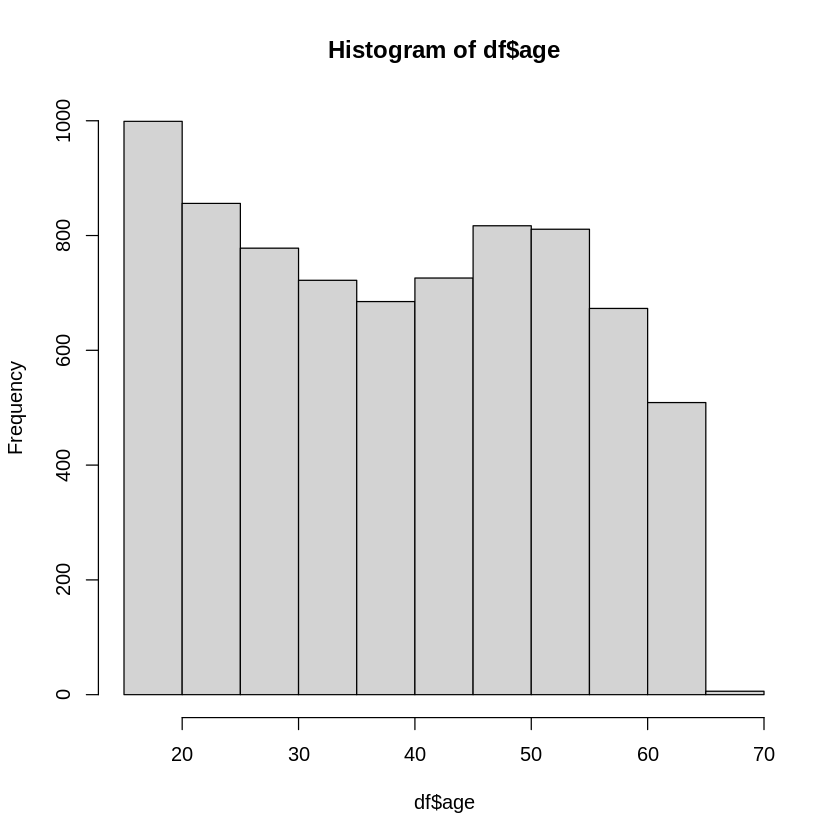

In [126]:
hist(df$age)

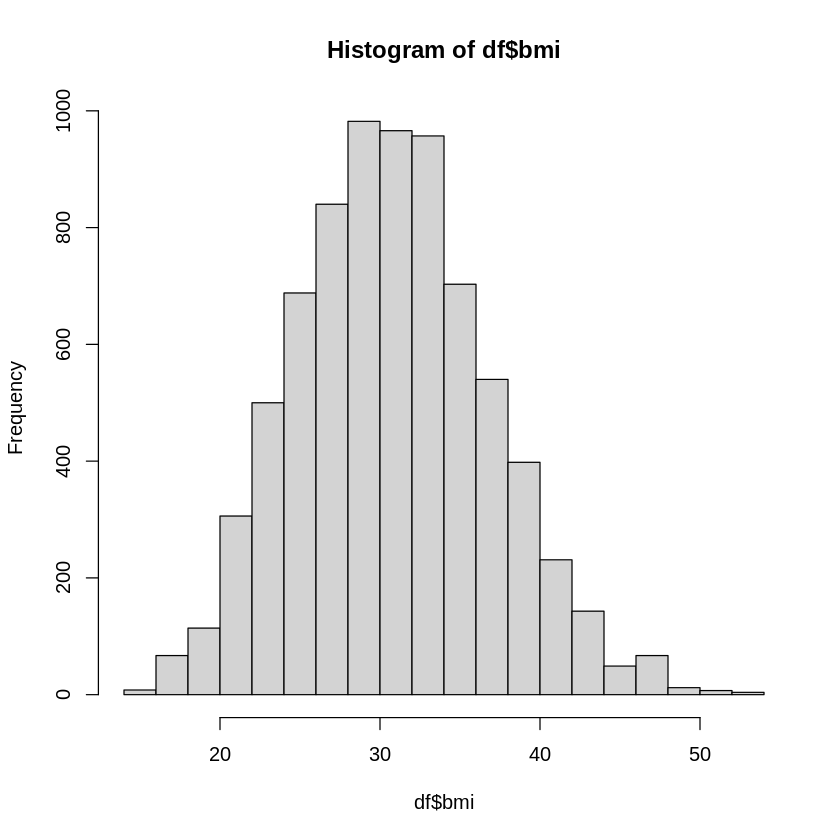

In [127]:
hist(df$bmi)

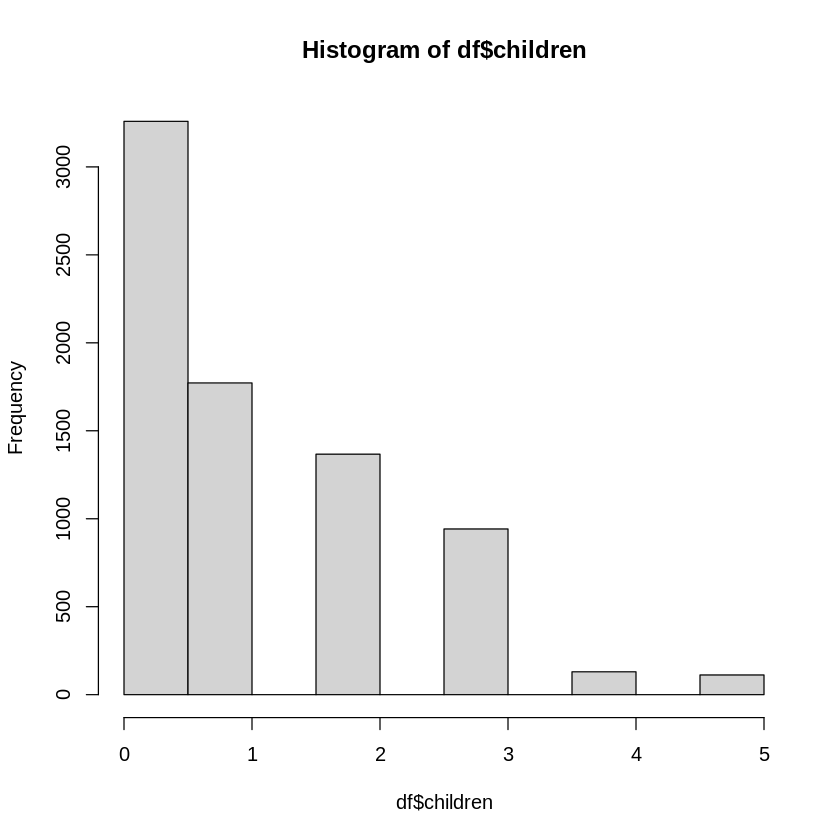

In [128]:
hist(df$children)

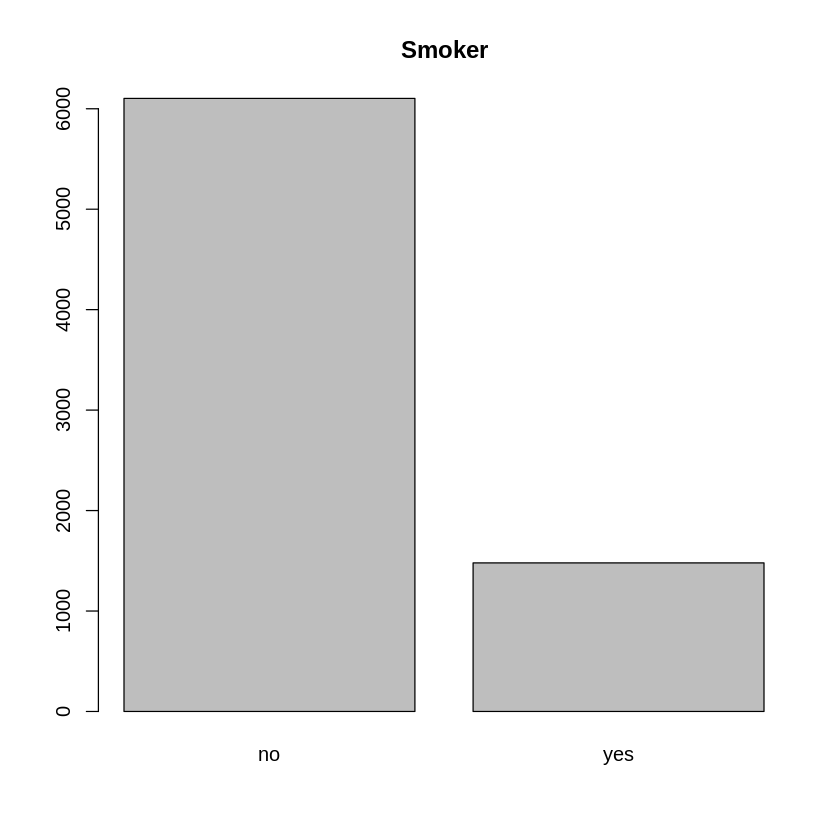

In [129]:
barplot(table(df$smoker),main="Smoker")

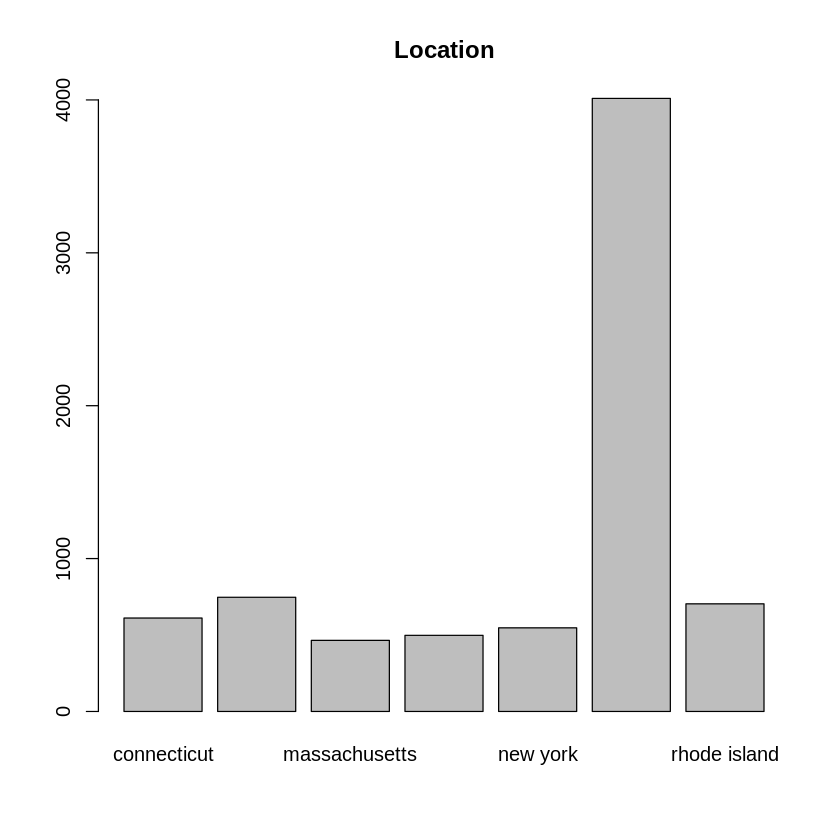

In [130]:
barplot(table(df$location),main = 'Location')

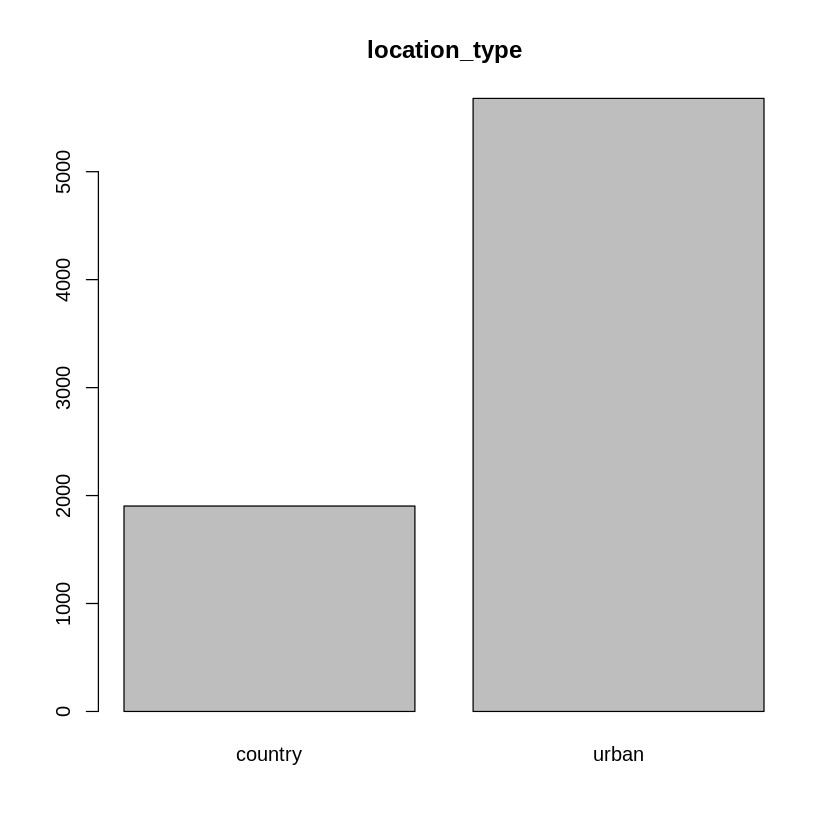

In [131]:
barplot(table(df$location_type),main = 'location_type' )

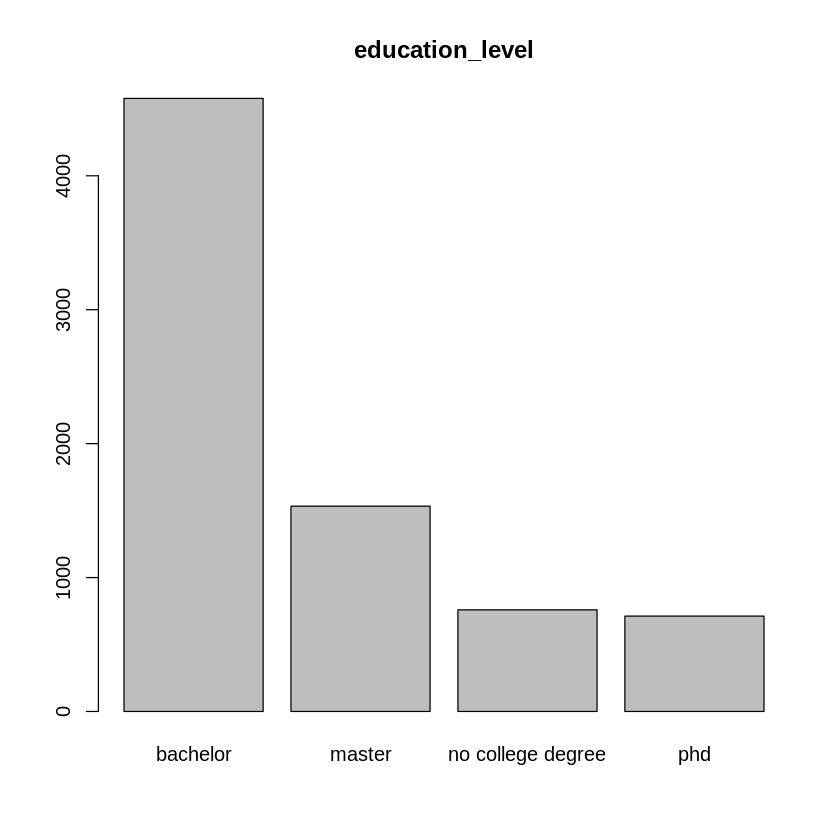

In [132]:
barplot(table(df$education_level), main = 'education_level')

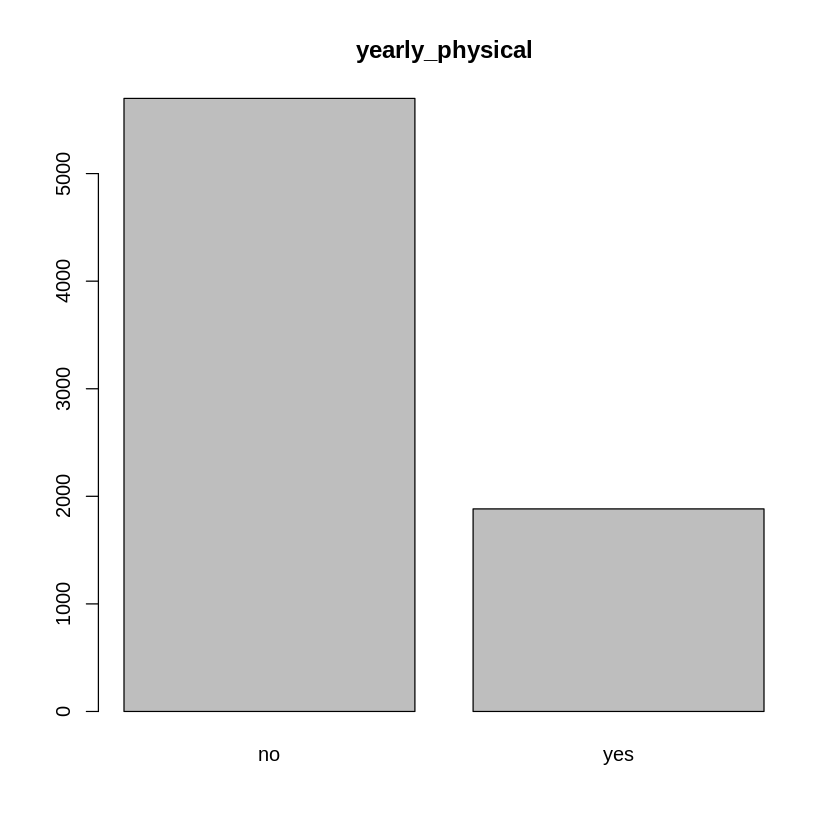

In [133]:
barplot(table(df$yearly_physical), main = 'yearly_physical')

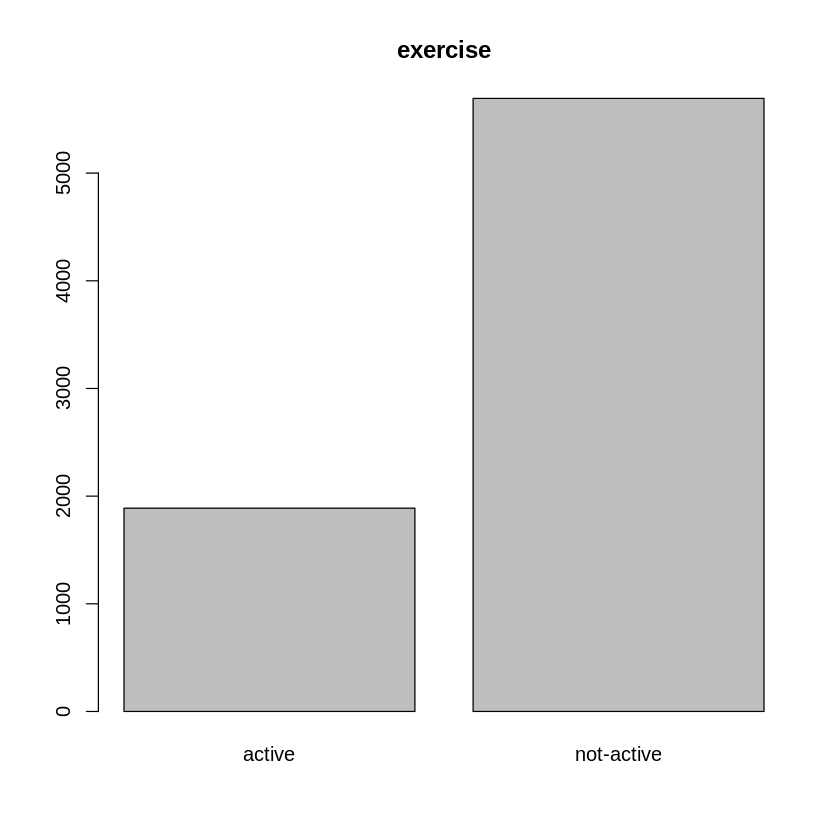

In [134]:
barplot(table(df$exercise),main = 'exercise')

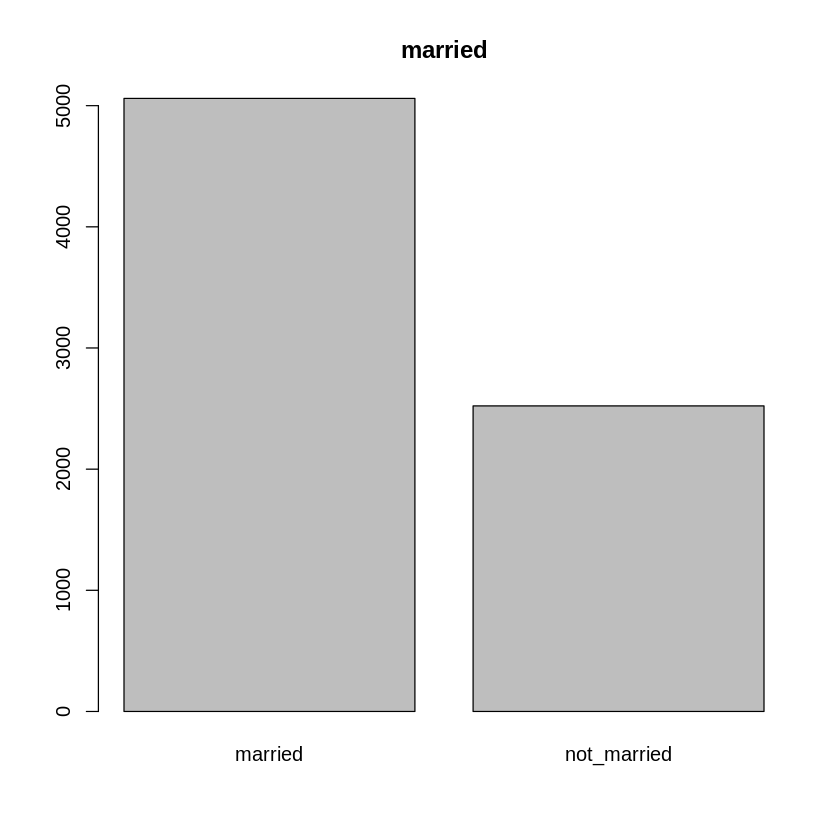

In [135]:
barplot(table(df$married),main = 'married')

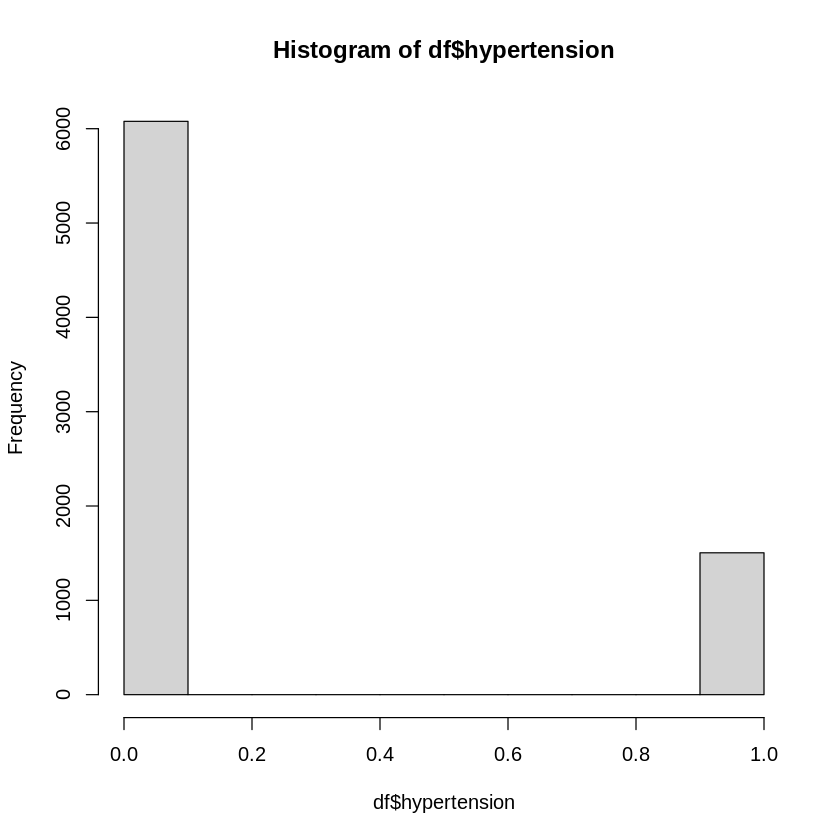

In [136]:
hist(df$hypertension)

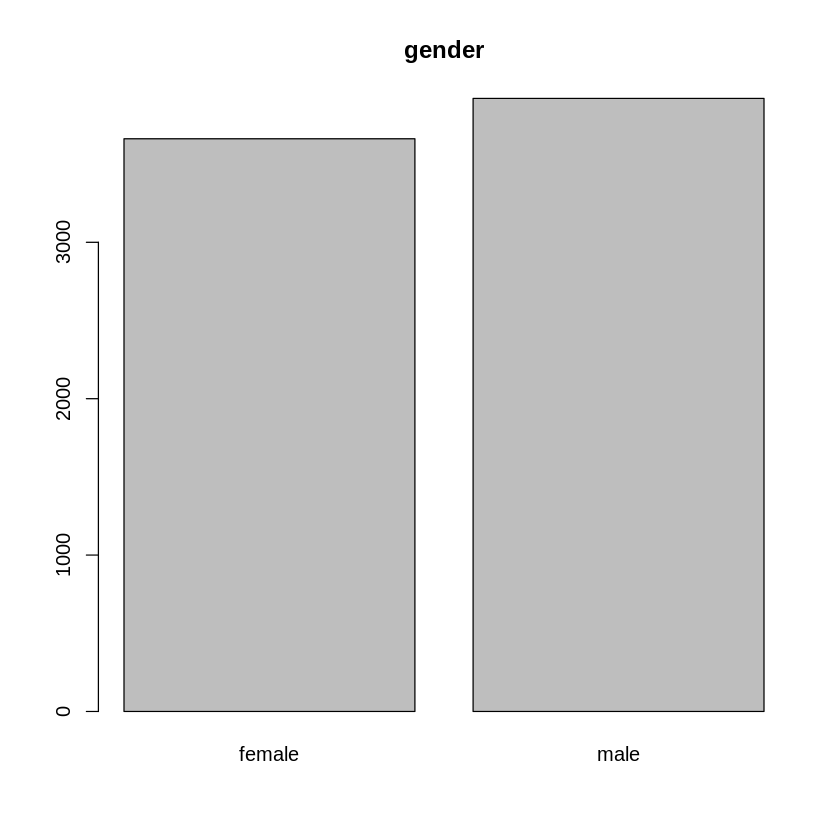

In [137]:
barplot(table(df$gender),main = 'gender')

1. **Age**: The distribution of ages follows a binomial pattern, seemingly evenly spread between 18 (the youngest) and 66 (the oldest). There are peaks in the dataset at ages around 20 and below, indicating a higher concentration of individuals in the younger age groups.

2. **BMI (Body Mass Index)**: BMI values display a normal distribution, ranging from 15.96 to 53.13, with an average of 30.79. BMI serves as a vital indicator of overall health. Most individuals in the dataset hover around a BMI of 30, which typically falls under the category of obesity, suggesting a prevalence of higher BMI values among the observed individuals.

3. **Children**: The 'Children' column ranges from 0 to 5, with an average value of 1.1 across the dataset.

4. **Smoker**: Among the observations, 5975 individuals are non-smokers, while 1449 individuals are smokers.

5. **Location**: The distribution across different locations is as follows: Connecticut (594), Maryland (732), Massachusetts (454), New Jersey (491), New York (534), Pennsylvania (3929), and Rhode Island (690).

6. **Location Type**: Observations reveal that 1854 individuals live in rural areas, while 5570 individuals reside in urban settings.

7. **Education Level**: Categories include No College Degree (742), Bachelor's (4483), Master's (1502), and PhD (697).

8. **Yearly Physical**: 5585 observations indicate no checkup with a doctor, while 1839 individuals report having visited a doctor.

9. **Exercise** : 1850 individuals are active, while 5574 individuals are not active in terms of exercise.

10. **Married**: Among the observations, 4951 individuals are married, while 2473 individuals are not.

11. **Hypertension**: The dataset displays 5934 instances without hypertension and 1490 instances with hypertension.

12. **Gender**: Observations consist of 3587 females and 3837 males.

### 5.2 Comparision of each column with Cost

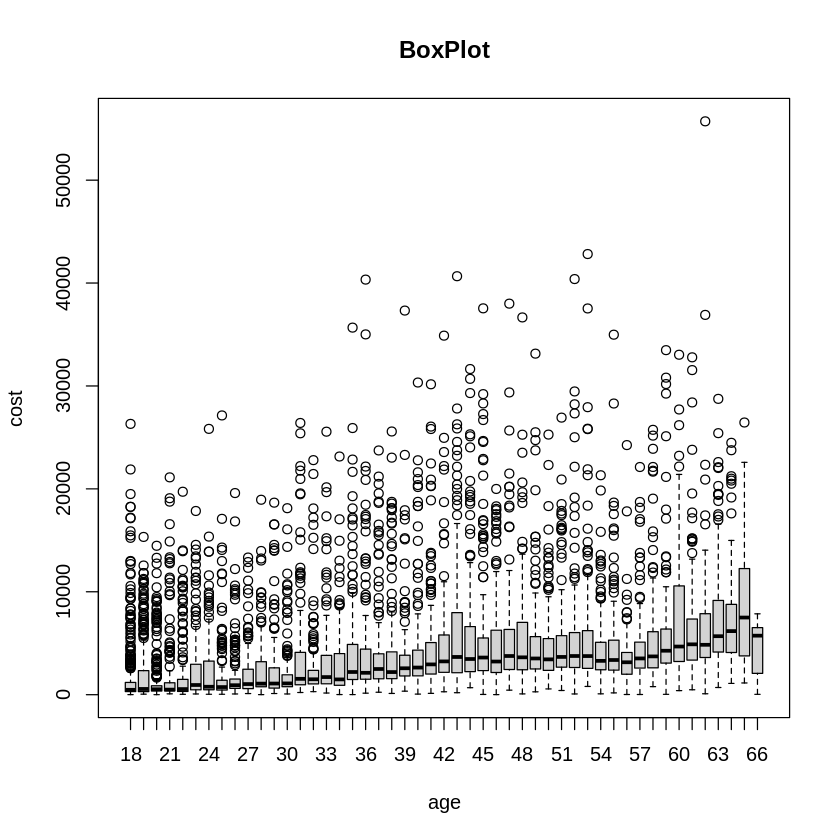

In [138]:
boxplot(cost ~ age , data = df,main = "BoxPlot")

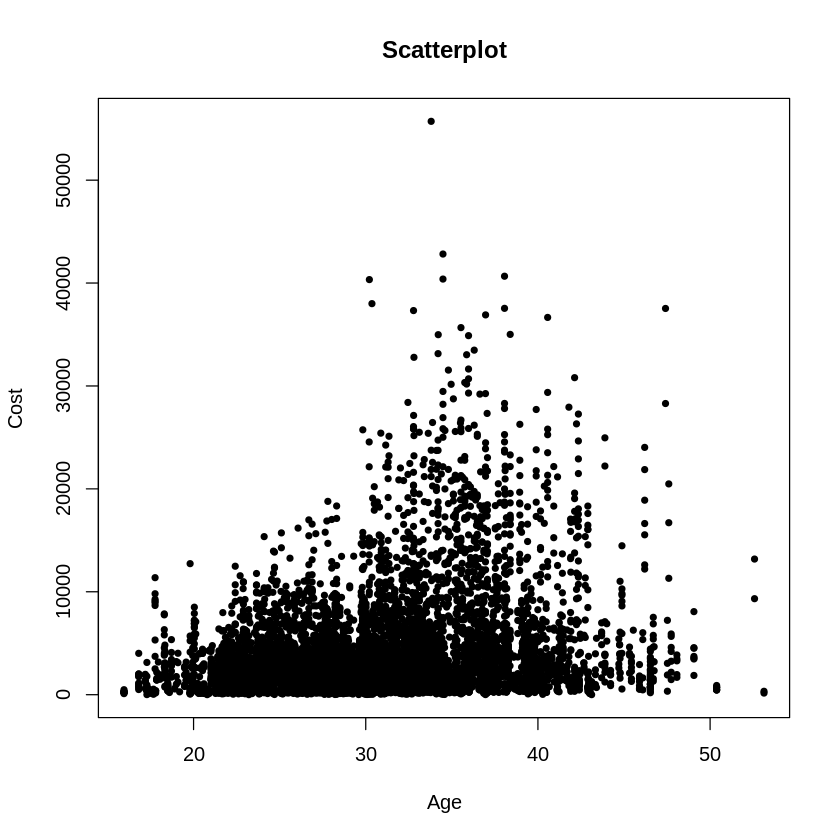

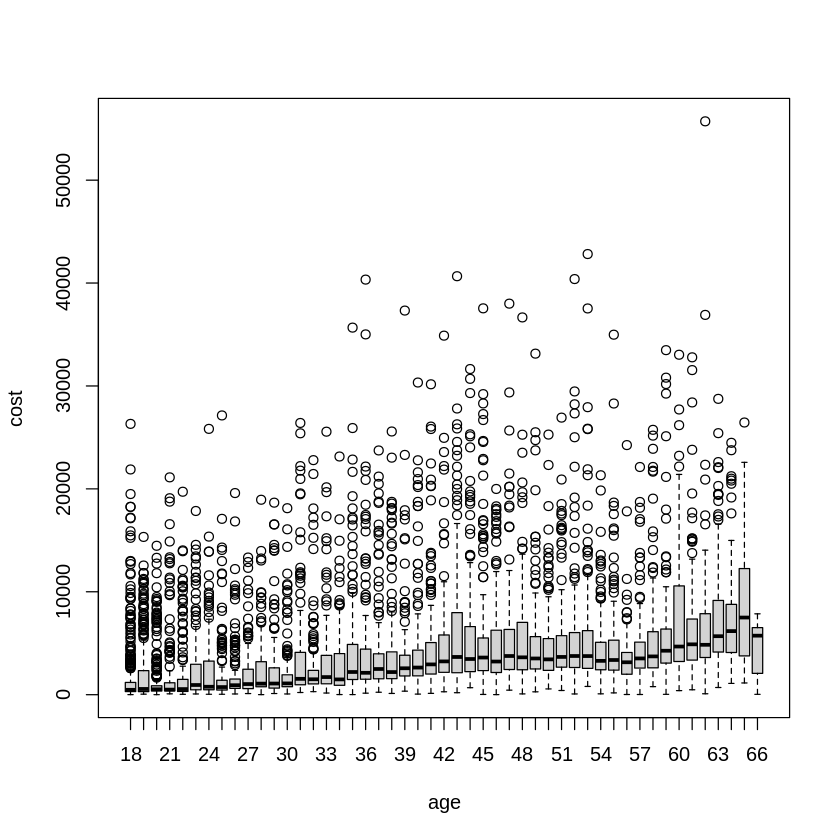

In [139]:
plot(df$bmi, df$cost, main = "Scatterplot", xlab = "Age", ylab = "Cost", col = "black", pch = 20)
boxplot(cost ~ age, data = df)

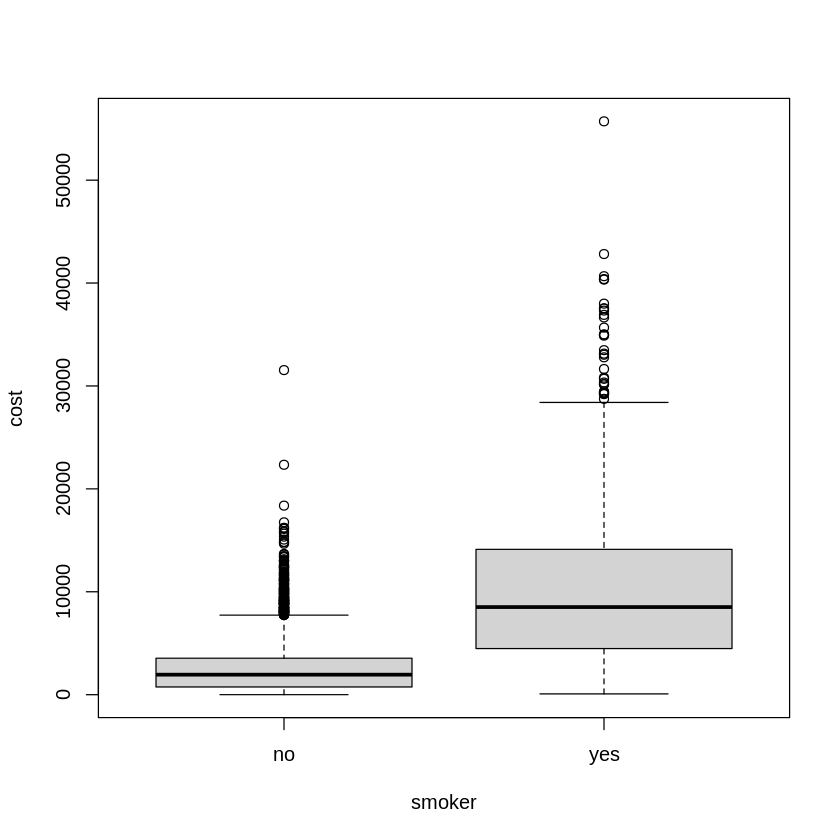

In [140]:
boxplot(cost ~ smoker , data = df)

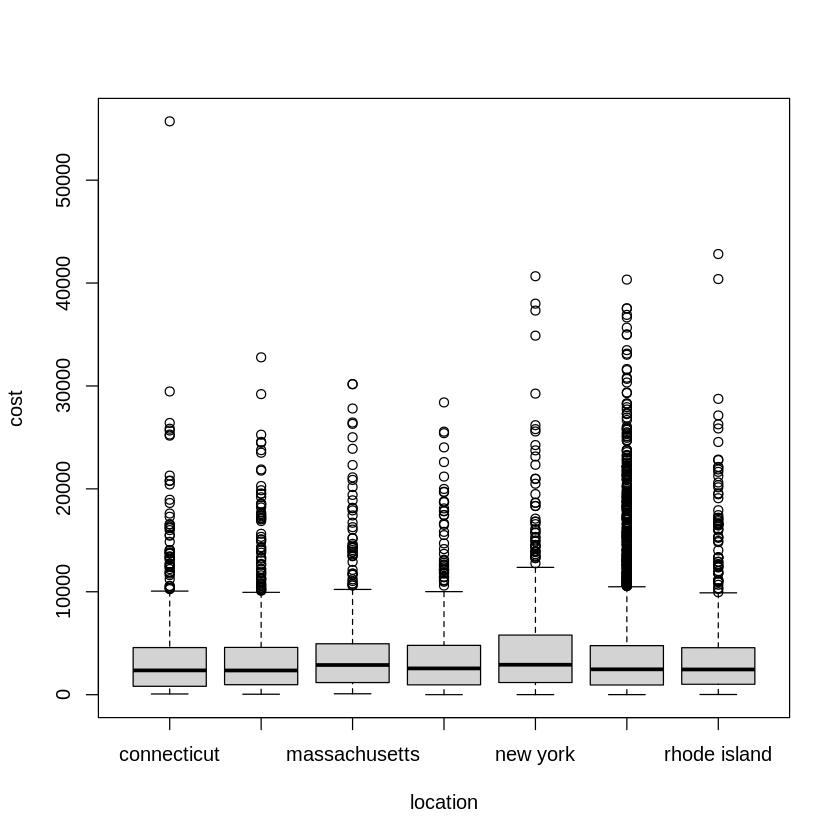

In [141]:
boxplot(cost ~ location , data = df)

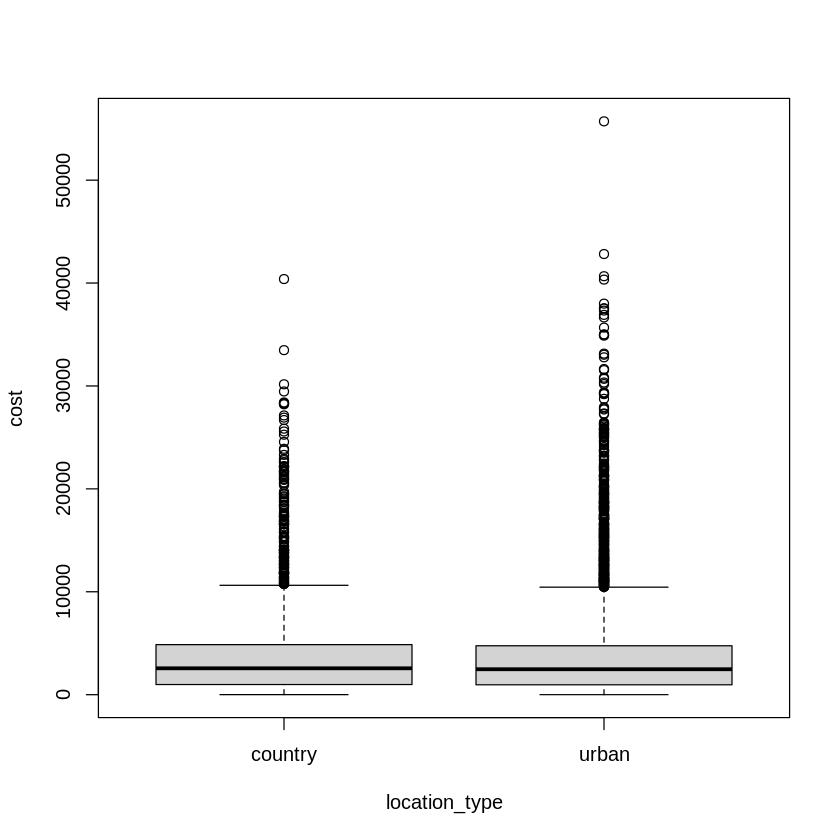

In [142]:
boxplot(cost ~ location_type , data = df)

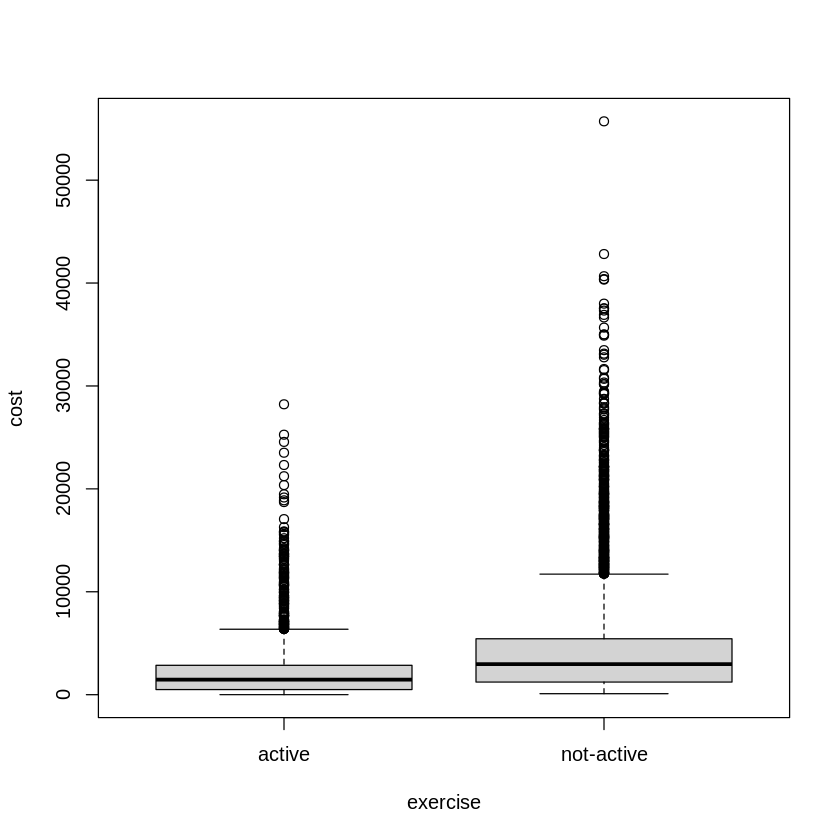

In [143]:
boxplot(cost ~ exercise , data = df)

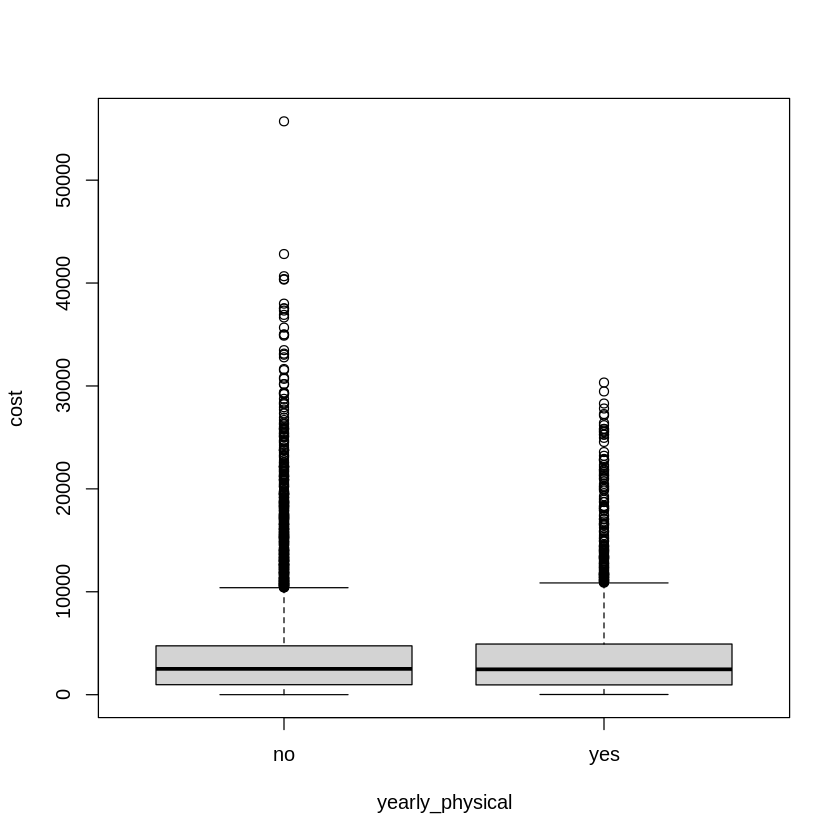

In [144]:
boxplot(cost ~ yearly_physical , data = df)

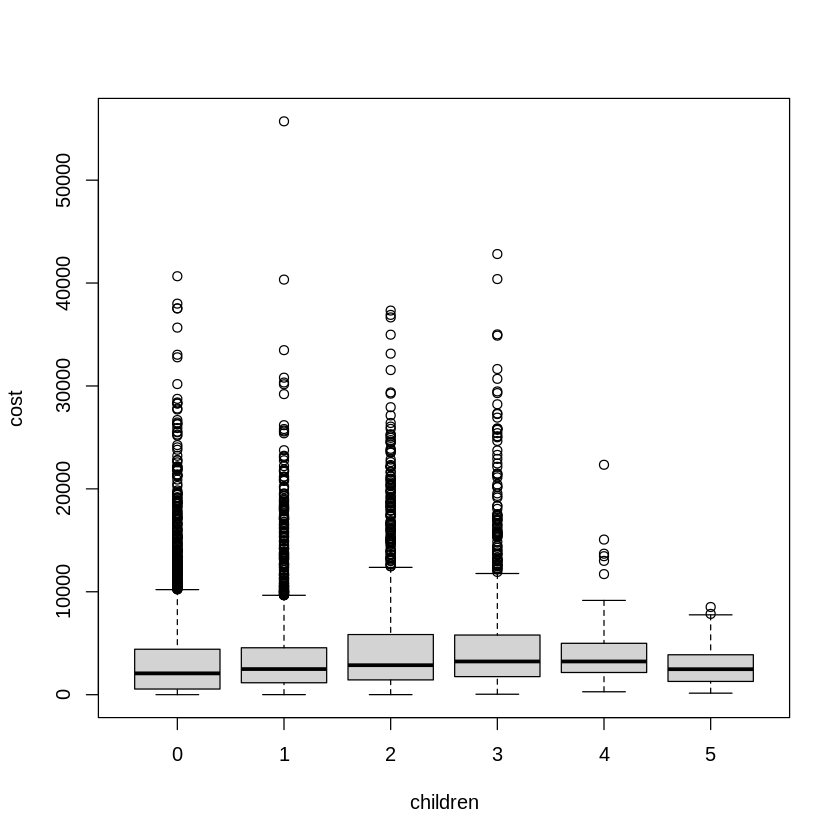

In [145]:
boxplot(cost ~ children , data = df)

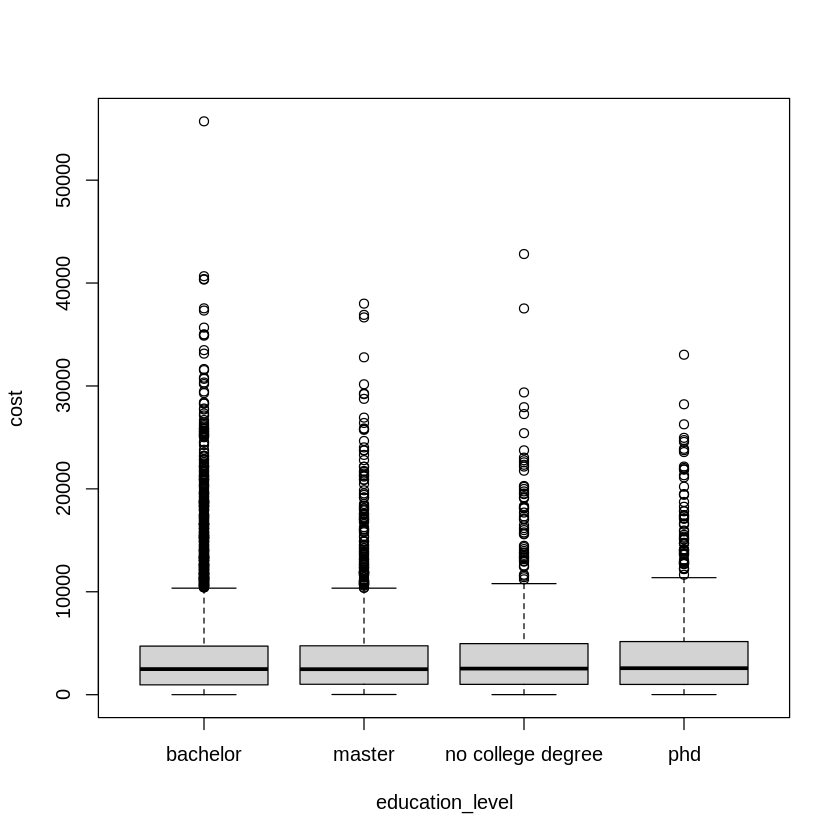

In [146]:
boxplot(cost ~ education_level , data = df)

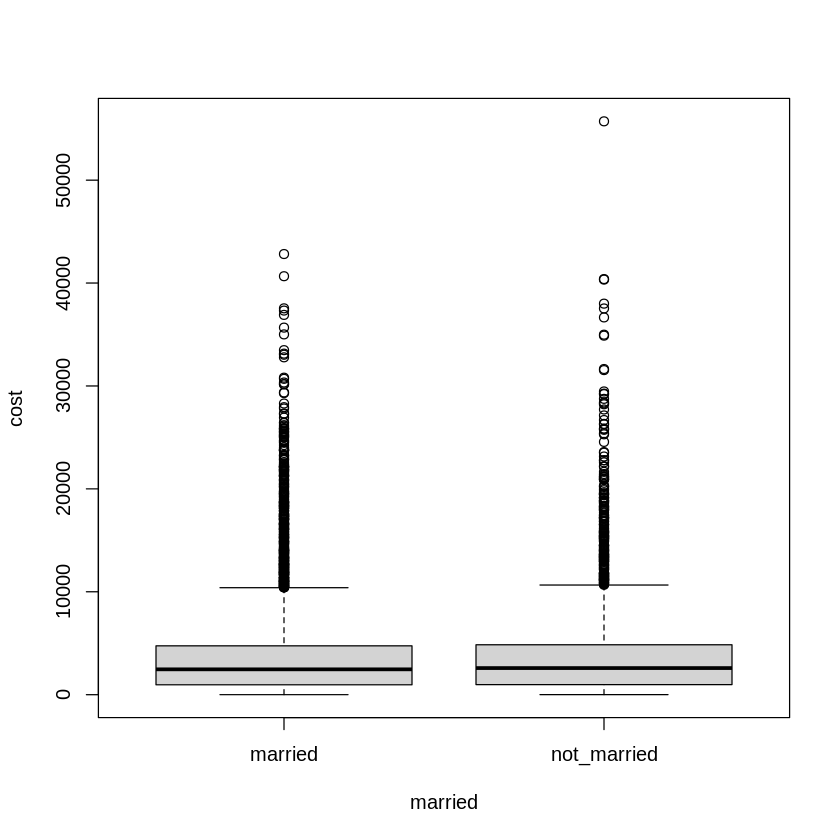

In [147]:
boxplot(cost ~ married , data = df)

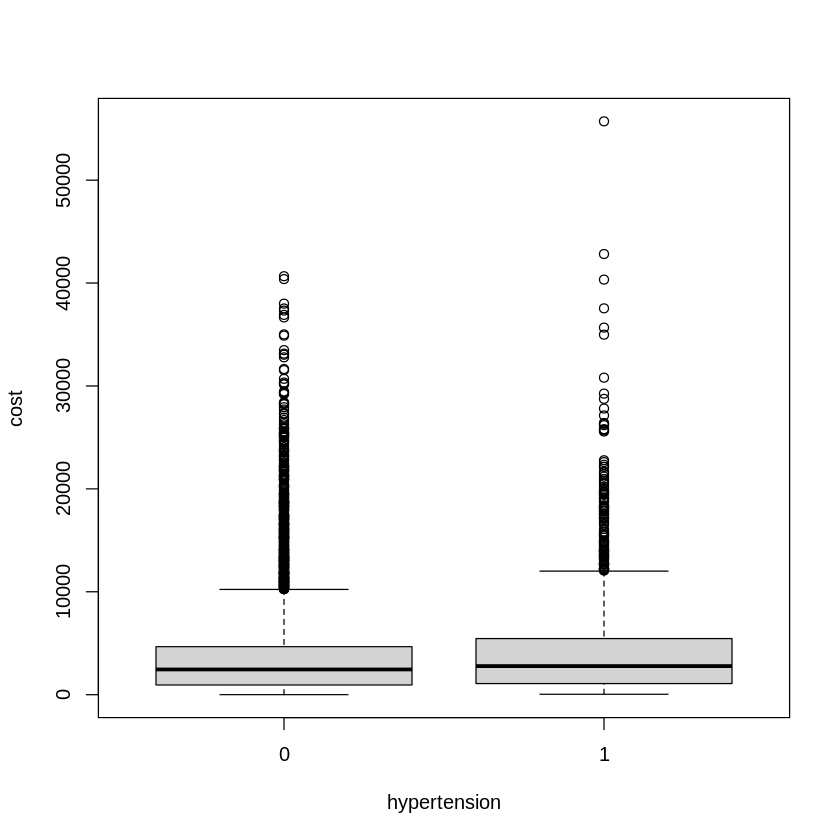

In [148]:
boxplot(cost ~ hypertension , data = df)

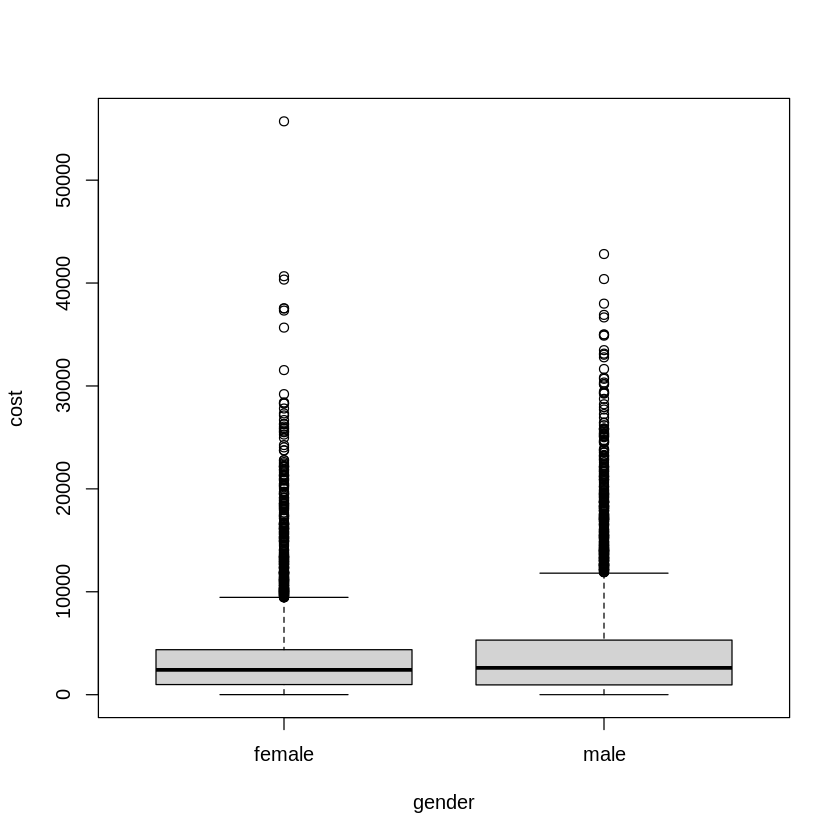

In [149]:
boxplot(cost ~ gender , data = df)

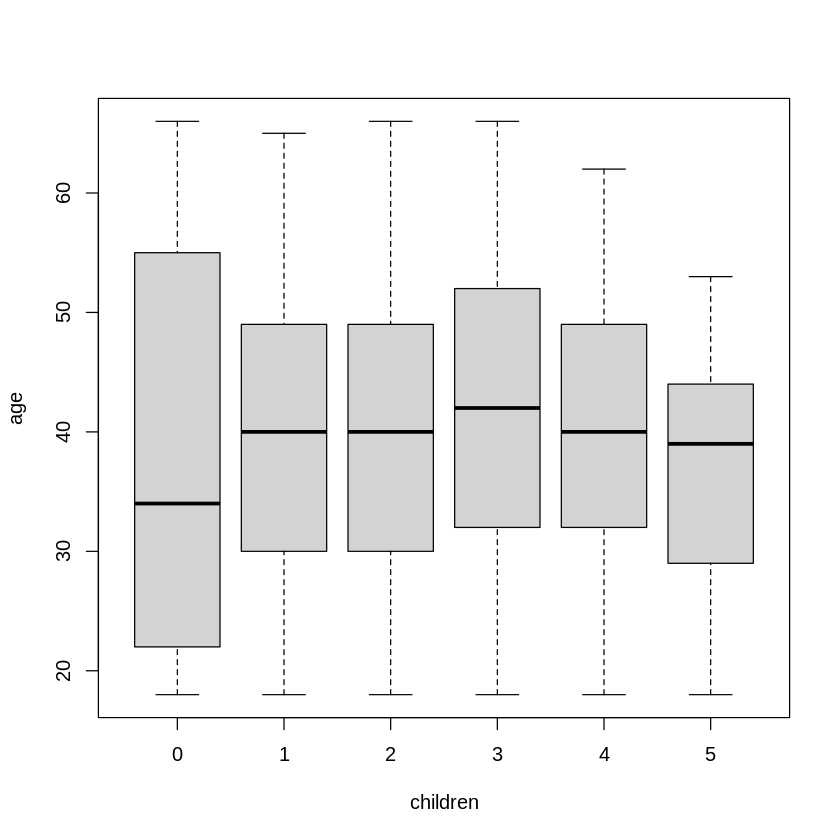

In [150]:
boxplot(age~children, data = df)

1.	**Age**: Observing the relationship between age and cost, it's noticeable that as individuals' age increases, their healthcare cost tends to rise as well.
2.	**Smoker**: The boxplot analysis reveals a substantial cost disparity between smokers and non-smokers. Non-smokers generally exhibit lower healthcare costs, although there are outlier instances among non-smokers with notably higher costs, possibly due to other influential factors.
3.	**Yearly Physical**: Interestingly, no discernible correlation is observed between 'yearly physical' checkups and healthcare cost. The same holds for variables like education level and marital status; these factors do not exhibit a direct impact on healthcare expenses.
4.	**Exercise**: Individuals classified as active (exercisers) tend to display lower healthcare costs compared to non-active counterparts.
5.	**Children**: Across the observations, the number of children does not notably impact healthcare costs, except for a slight variance noticed among those with 2-3 children.
6.	**Education Level**: Similarly, education level demonstrates no direct link to cost fluctuations; higher or lower education attainment does not distinctly affect healthcare expenses.
7.	**BMI**: A discernible correlation surfaces between BMI and cost, where higher BMI values coincide with increased healthcare expenses.
8.	**Location**: Location exhibits no significant divergence in healthcare costs across various regions.
9.	**Location Type**: Similarly, the type of location (urban or rural) doesn't portray a significant difference in healthcare expenses.
10.	**Married**: Marriage status doesn't notably differentiate healthcare costs among individuals.
11.	**Hypertension**: No prominent divergence in healthcare costs is seen based on hypertension status.
12.	**Gender**: The gender of individuals doesn't significantly sway healthcare expenses in this dataset.

### 5.3 Correlation of three attributes

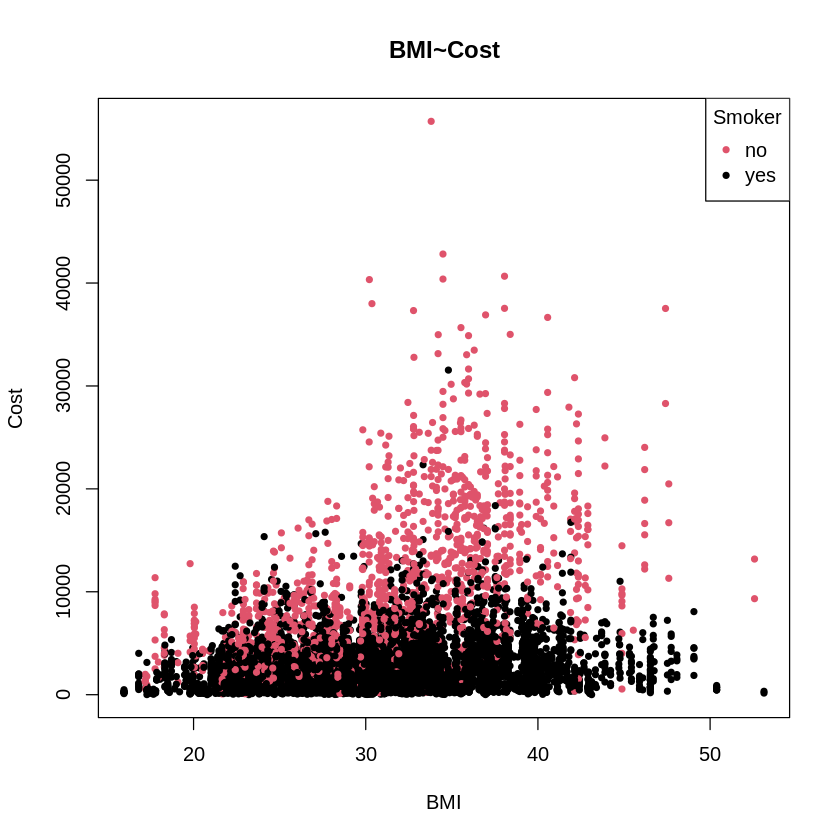

In [151]:
# Convert 'smoker' column to a numeric index
df$smoker_index <- as.numeric(factor(df$smoker))

# Plotting with 'BMI' vs 'Cost', using 'smoker_index' for colors
plot(df$bmi, df$cost, main = "BMI~Cost", xlab = "BMI", ylab = "Cost", col = df$smoker_index, pch = 20)

# Adding a legend for the colors
legend("topright", legend = levels(df$smoker), col = unique(df$smoker_index), pch = 20, title = "Smoker")

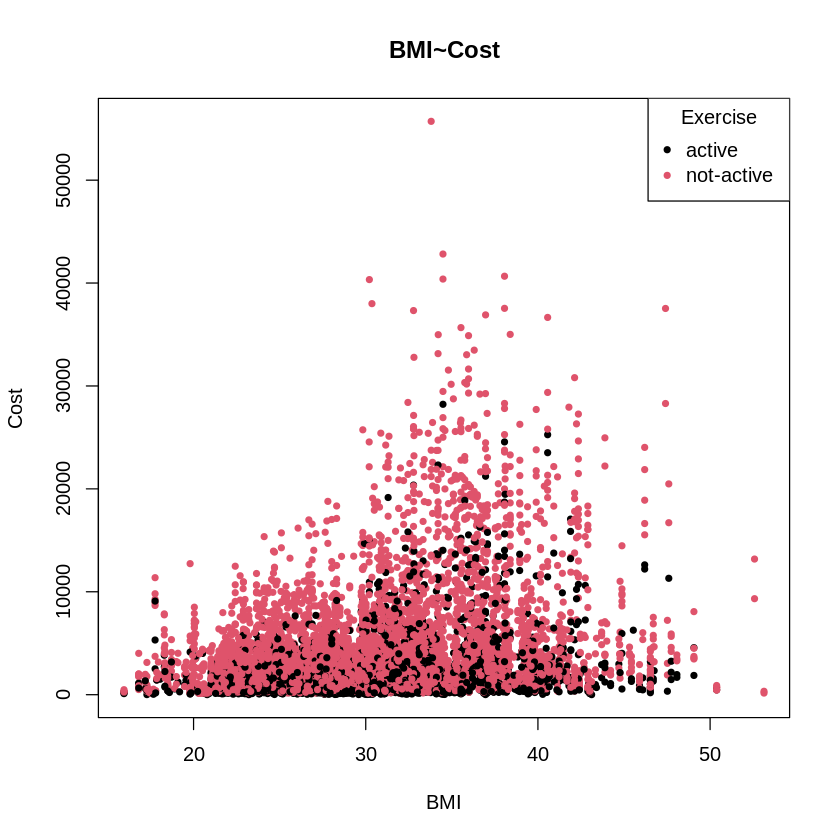

In [152]:
# Convert 'smoker' column to a numeric index
df$exercise_index <- as.numeric(factor(df$exercise))

# Plotting with 'BMI' vs 'Cost', using 'smoker_index' for colors
plot(df$bmi, df$cost, main = "BMI~Cost", xlab = "BMI", ylab = "Cost", col = df$exercise_index, pch = 20)

# Adding a legend for the colors
legend("topright", legend = levels(df$exercise), col = unique(df$exercise_index), pch = 20, title = "Exercise")

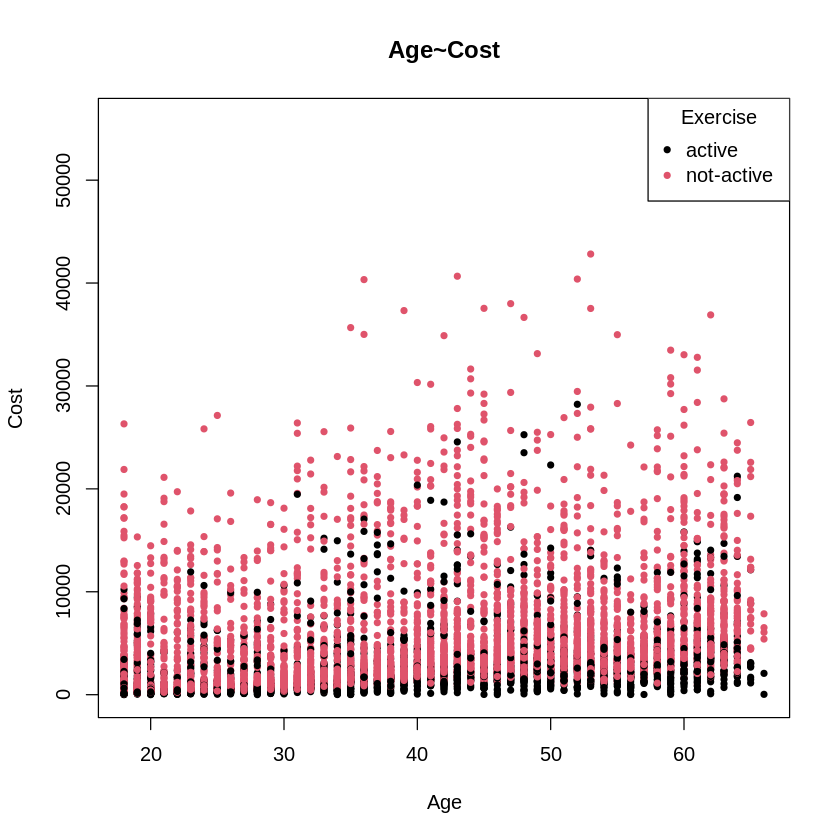

In [153]:
# Convert 'smoker' column to a numeric index
df$exercise_index <- as.numeric(factor(df$exercise))

# Plotting with 'Age' vs 'Cost', using 'smoker_index' for colors
plot(df$age, df$cost, main = "Age~Cost", xlab = "Age", ylab = "Cost", col = df$exercise_index, pch = 20)

# Adding a legend for the colors
legend("topright", legend = levels(df$exercise), col = unique(df$exercise_index), pch = 20, title = "Exercise")

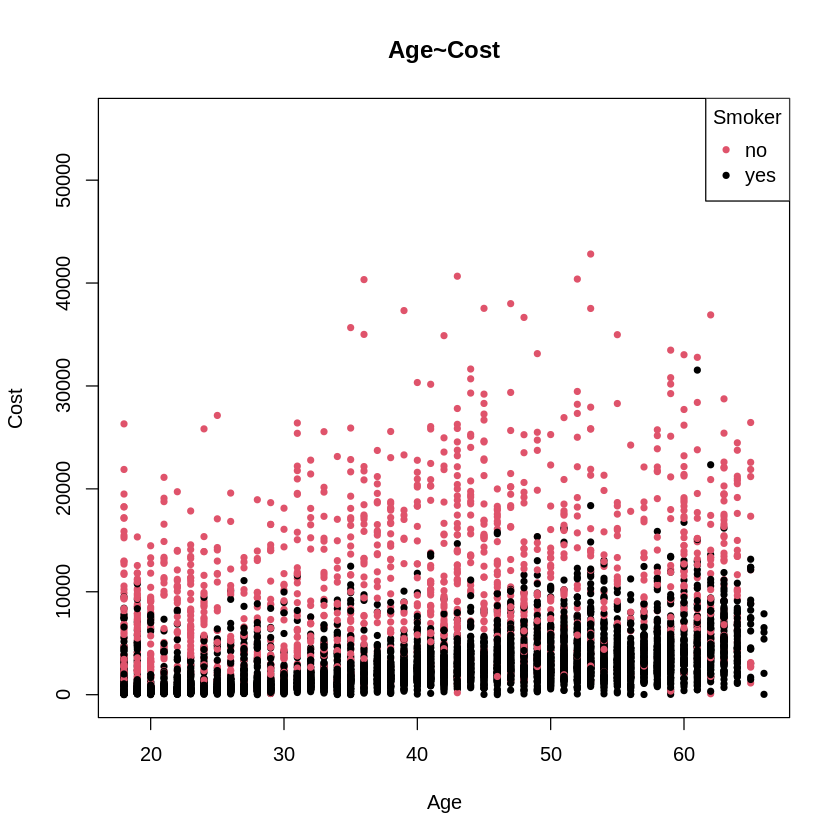

In [154]:
# Convert 'smoker' column to a numeric index
df$smoker_index <- as.numeric(factor(df$smoker))

# Plotting with 'Age' vs 'Cost', using 'smoker_index' for colors
plot(df$age, df$cost, main = "Age~Cost", xlab = "Age", ylab = "Cost", col = df$smoker_index, pch = 20)

# Adding a legend for the colors
legend("topright", legend = levels(df$smoker), col = unique(df$smoker_index), pch = 20, title = "Smoker")

1.	**BMI Vs Cost with Smoker**: The scatter plot depicting BMI, cost, and smoker status highlights a distinct pattern. Non-smokers tend to have lower healthcare costs compared to smokers. Notably, a cluster of observations with a BMI above 30 (indicating obesity) stands out, correlating with higher costs among smokers.
2.	**BMI Vs Cost with Exercise**: This scatter plot underscores a noticeable correlation among non-exercisers, higher BMI values, and increased healthcare costs. Observations reveal that individuals categorized as non-active, particularly those with elevated BMI values, tend to incur higher healthcare expenses.
3.	**Age Vs Cost with Exercise**: The relationship displayed in this graph demonstrates a correlation between age, exercise patterns, and healthcare costs. The visualization distinctly illustrates that as individuals age and engage less in exercise, their healthcare expenditures notably escalate.
4.	**Age Vs Cost with Smoker**: As anticipated, the graph representing age, smoker status, and healthcare costs corroborates the notion that smokers tend to incur higher expenses. Additionally, the correlation between age advancement and increased costs is evident, further accentuated among the smoker population, where costs are notably higher compared to non-smokers as age progresses.


### 5.4 Average Cost by State

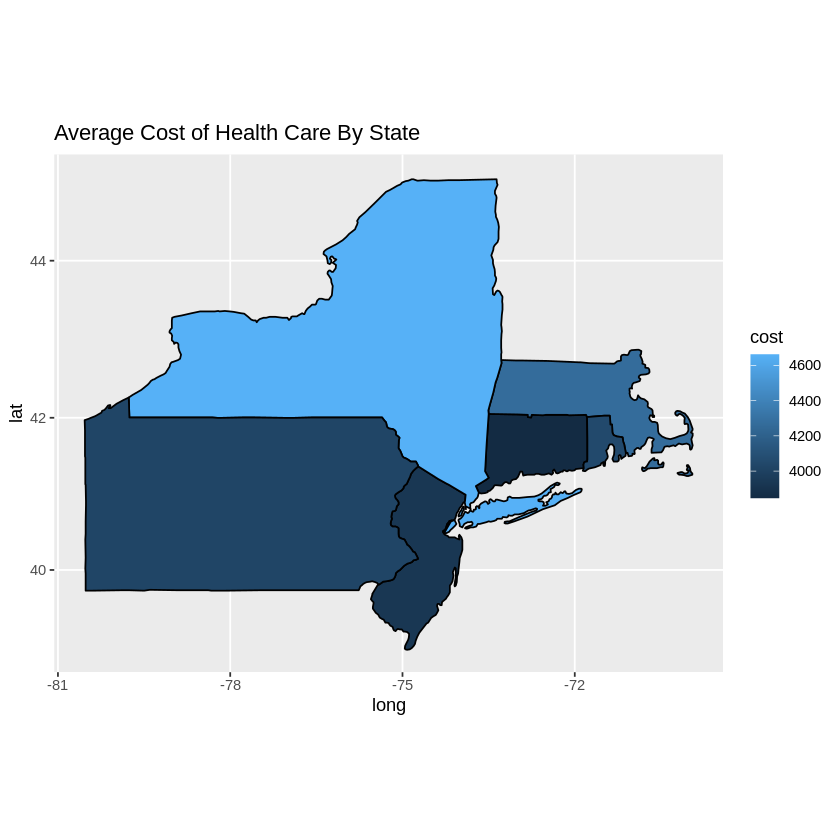

In [155]:
#Map of Avg Cost

us <- map_data("state")
mapdf <- df %>% group_by(location) %>%
  summarise(mean(cost)) %>%
  rename(region = location, cost = 'mean(cost)')
CT <- us %>% filter(region == c("connecticut"))
MA <- us %>% filter(region == c("massachusetts"))
NJ <- us %>% filter(region == c("new jersey"))
NY <- us %>% filter(region == c("new york"))
PA <- us %>% filter(region == c("pennsylvania"))
RI <- us %>% filter(region == c("rhode island"))
states <- bind_rows(CT, MA, NJ, NY, PA, RI)


formap <- left_join(states, mapdf, by = "region")
map2 <- ggplot(formap) +
       geom_polygon(color="black", aes(x = long, y = lat, group = group,
                                       fill = cost)) +
       coord_map() +
       expand_limits(x=formap$long, y=formap$lat) +
       ggtitle("Average Cost of Health Care By State")
map2

Upon conducting our previous analysis, we identified that our dataset comprises individuals from a select group of Upper East Side states, namely: Connecticut, Maryland, Massachusetts, New Jersey, New York, Pennsylvania, and Rhode Island. The accompanying map visualizes the average healthcare costs across these states. Notably, the state of New York stands out with notably higher healthcare costs compared to the other included states. This observation underscores the significance of focusing our final insights and strategic considerations specifically on these identified states.

## 6. Splitting Data into Test-Train

In [156]:
#Check if there is any person with score 0
print (sum(df$score == 0))

#Make a copy of dataframe
df1 <- df

#Get rid of cost and score column
df1 <- select(df1, -c(score,smoker_index,exercise_index))

[1] 0


In [157]:
# generate a list of cases to include in the training data
# 'expensive' column is used as the outcome variable (dependent variable)
# p = 0.60 indicates a 60-40 split for training and testing data
trainList <- createDataPartition(y = df1$expensive, p = 0.60, list = FALSE)

# The split is 60% training and 40% test

# Create a trainSet subset dataframe from df1 using the indices from trainList
trainSet <- df1[trainList,]

# Create a testing data set using the remaining data not in the training set
testSet <- df1[-trainList,]


In [158]:
print(dim(trainSet))
print(dim(testSet))

[1] 4550   15
[1] 3032   15


In [159]:
head(trainSet,2)

X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost,expensive
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>
3,27,33.00,3,no,massachusetts,urban,master,no,active,married,0,male,576,FALSE
5,32,28.88,0,no,pennsylvania,country,phd,no,not-active,married,0,male,836,FALSE


## 7. Trainnig Models

### 7.1 Logistics Regression

In [160]:
str(trainSet)

tibble [4,550 × 15] (S3: tbl_df/tbl/data.frame)
 $ X              : num [1:4550] 3 5 7 9 10 11 12 13 14 16 ...
 $ age            : num [1:4550] 27 32 47 36 59 24 61 22 57 18 ...
 $ bmi            : num [1:4550] 33 28.9 33.4 29.8 25.8 ...
 $ children       : num [1:4550] 3 0 1 2 0 0 0 0 0 1 ...
 $ smoker         : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 2 1 1 1 ...
 $ location       : Factor w/ 7 levels "connecticut",..: 3 6 6 6 6 6 1 2 2 6 ...
 $ location_type  : Factor w/ 2 levels "country","urban": 2 1 2 2 1 2 2 2 2 1 ...
 $ education_level: Factor w/ 4 levels "bachelor","master",..: 2 4 1 1 1 1 3 1 1 3 ...
 $ yearly_physical: Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 2 2 ...
 $ exercise       : Factor w/ 2 levels "active","not-active": 1 2 2 1 2 1 1 2 2 2 ...
 $ married        : Factor w/ 2 levels "married","not_married": 1 1 1 1 1 1 1 1 1 2 ...
 $ hypertension   : num [1:4550] 0 0 0 0 1 0 0 0 0 0 ...
 $ gender         : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 1 2 1 

In [167]:
# Building a linear regression model
lm_model <- glm(expensive ~ . - X - cost - location - location_type - education_level  - married  - gender - yearly_physical, data = trainSet, family = binomial)
# Summary of the linear regression model
summary(lm_model)


Call:
glm(formula = expensive ~ . - X - cost - location - location_type - 
    education_level - married - gender - yearly_physical, family = binomial, 
    data = trainSet)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -12.189320   0.468389 -26.024  < 2e-16 ***
age                  0.082188   0.004492  18.297  < 2e-16 ***
bmi                  0.129915   0.008945  14.523  < 2e-16 ***
children             0.182545   0.040546   4.502 6.73e-06 ***
smokeryes            5.267821   0.171154  30.778  < 2e-16 ***
exercisenot-active   2.337150   0.160754  14.539  < 2e-16 ***
hypertension         0.326766   0.123482   2.646  0.00814 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5172.5  on 4549  degrees of freedom
Residual deviance: 2580.8  on 4543  degrees of freedom
AIC: 2594.8

Number of Fisher Scoring iterations: 6



The logistic regression model constructed aimed to predict the likelihood of an observation being labeled as 'expensive.' The model's coefficients revealed essential insights into the influence of various factors on this classification. Age and BMI showed a positive association with higher healthcare expenses, with each unit increase correlating to increased odds of being categorized as 'expensive.' Additionally, smoking status, lack of exercise, having children, and hypertension also significantly impacted the likelihood of being classified as 'expensive.' The model's deviance indicated a substantial improvement from the null model, suggesting that the included predictors contributed to explaining the variation in the data. With a lower Akaike Information Criterion (AIC), indicating better model fit, and the significance of predictors, this logistic regression offers valuable insights into the factors driving higher healthcare expenses.

In [172]:
# Predict on the test set
predictions <- predict(lm_model, newdata = testSet, type = "response")
# Convert predicted probabilities to classes based on a threshold
threshold <- 0.5  # Adjust the threshold if necessary
predicted_class <- ifelse(predictions > threshold, TRUE, FALSE)
predicted_class <- as.factor(predicted_class)

In [173]:
conf_matrix <- confusionMatrix(predicted_class, testSet$expensive)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE  2173  244
     TRUE     84  531
                                          
               Accuracy : 0.8918          
                 95% CI : (0.8802, 0.9027)
    No Information Rate : 0.7444          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6951          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9628          
            Specificity : 0.6852          
         Pos Pred Value : 0.8990          
         Neg Pred Value : 0.8634          
             Prevalence : 0.7444          
         Detection Rate : 0.7167          
   Detection Prevalence : 0.7972          
      Balanced Accuracy : 0.8240          
                                          
       'Positive' Class : FALSE           
                     

The confusion matrix summarizes the performance of the logistic regression model in classifying 'expensive' and 'not expensive' healthcare cases. It correctly identified 2173 cases as 'not expensive' and 531 cases as 'expensive.' However, it misclassified 244 'expensive' cases as 'not expensive' and 84 'not expensive' cases as 'expensive.' The model achieved an accuracy of 89.18%, indicating its overall effectiveness in prediction. Sensitivity, measuring the true positive rate, stands at 96.28%, reflecting the model's capability to accurately identify 'not expensive' cases. On the other hand, specificity, representing the true negative rate, is at 68.52%, indicating the model's moderate performance in recognizing 'expensive' cases. The positive predictive value (PPV) of 89.90% highlights the reliability of the model in correctly identifying 'not expensive' cases among all cases it predicted as such. However, the negative predictive value (NPV) of 86.34% indicates a slightly lower reliability in correctly identifying 'expensive' cases among all cases it predicted as such. Overall, while the model demonstrates strong performance in identifying 'not expensive' cases, it could benefit from improvement in correctly identifying 'expensive' cases to enhance its predictive capability across both categories.

### 7.2 Decision Tree Model

In [174]:
treeModel <- rpart(expensive ~ . - X - cost - location - location_type - education_level - married - gender - yearly_physical, data = trainSet)


In [177]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



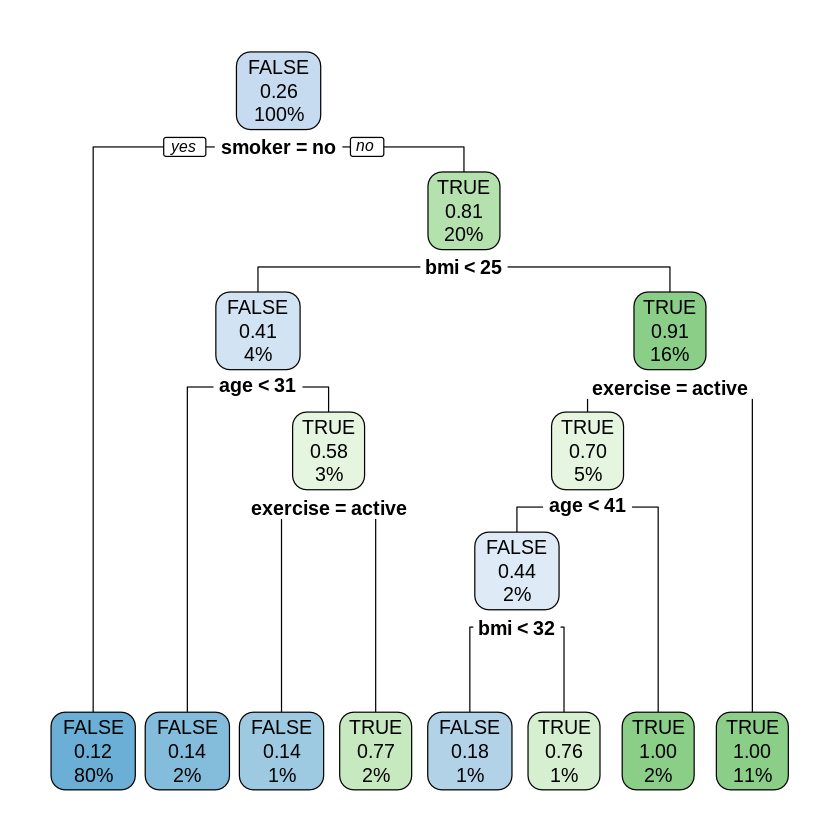

In [178]:
library(rpart.plot)
rpart.plot(treeModel)

In [179]:
#Predict the training cases
treePred <- predict(treeModel, testSet, type = 'class')

In [180]:
confusionMatrix(treePred, testSet$expensive)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE  2239  305
     TRUE     18  470
                                          
               Accuracy : 0.8935          
                 95% CI : (0.8819, 0.9042)
    No Information Rate : 0.7444          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6813          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9920          
            Specificity : 0.6065          
         Pos Pred Value : 0.8801          
         Neg Pred Value : 0.9631          
             Prevalence : 0.7444          
         Detection Rate : 0.7385          
   Detection Prevalence : 0.8391          
      Balanced Accuracy : 0.7992          
                                          
       'Positive' Class : FALSE           
                     

The provided confusion matrix and associated metrics evaluate a classification model's performance. With an accuracy of 89.35%, the model demonstrates a strong overall predictive capability. The Kappa coefficient of 0.6813 signifies a moderate agreement beyond random chance. Notably, the model exhibits high sensitivity (True Positive Rate) at 99.20%, suggesting its effectiveness in correctly identifying actual positive instances. However, its specificity (True Negative Rate) at 60.65% indicates a lower ability to accurately identify actual negative instances. The positive predictive value stands at 88.01%, depicting the model's precision in positive predictions, while the negative predictive value is 96.31%, indicating high accuracy in negative predictions. The prevalence of positive instances in the dataset is 74.44%, and the balanced accuracy of 79.92% provides a fair assessment considering the dataset's balance. Additionally, McNemar's Test underscores a significant difference between the model's predictions and expected values.

### 7.3 SVM

In [182]:
svm_model <- svm(expensive ~ . - X - cost - location - location_type - education_level - married - gender - yearly_physical, data = trainSet, kernel = "linear")

# Make predictions on the test set
predictions <- predict(svm_model, newdata = testSet)

# Evaluate the model
confusionMatrix(predictions, testSet$expensive)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE  2169  290
     TRUE     88  485
                                         
               Accuracy : 0.8753         
                 95% CI : (0.863, 0.8869)
    No Information Rate : 0.7444         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6417         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9610         
            Specificity : 0.6258         
         Pos Pred Value : 0.8821         
         Neg Pred Value : 0.8464         
             Prevalence : 0.7444         
         Detection Rate : 0.7154         
   Detection Prevalence : 0.8110         
      Balanced Accuracy : 0.7934         
                                         
       'Positive' Class : FALSE          
                                         

The confusion matrix and associated metrics from the KSVM model's evaluation showcase its classification performance. With an accuracy of 87.53%, the model demonstrates reasonably good overall predictive ability. The Kappa coefficient at 0.6417 suggests a moderate agreement beyond random chance. The model exhibits high sensitivity (True Positive Rate) at 96.10%, indicating its proficiency in accurately identifying actual positive instances. However, its specificity (True Negative Rate) at 62.58% signifies a lower ability to precisely identify actual negative instances. The positive predictive value stands at 88.21%, indicating the model's precision in predicting positive instances, while the negative predictive value is 84.64%, showing strong accuracy in negative predictions. The prevalence of positive instances in the dataset is 74.44%, and the balanced accuracy of 79.34% provides a fair assessment considering the dataset's balance. McNemar's Test further emphasizes a significant distinction between the model's predictions and expected values.

### 7.4 Best Model

In [183]:
saveRDS(treeModel, "treeModel.rds")

In assessing the performance of three classification models—Logistic Regression, Decision Tree, and Support Vector Machine (SVM)—the Decision Tree model emerges as the most balanced and effective choice. With an accuracy of 89.35% and a Kappa score of 0.6813, the Decision Tree demonstrates commendable predictive ability beyond random chance. Notably, its exceptional sensitivity of 99.20% indicates a strong capability to correctly identify true positive instances. While the Logistic Regression model shows a higher specificity at 68.52%, the Decision Tree maintains a balanced accuracy of 79.92%, surpassing both SVM (79.34%) and Logistic Regression (82.40%) models.